<a href="https://colab.research.google.com/github/nandwanatarun/EVA-DeepLearning/blob/Session-4/S4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vanilla network:-


In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


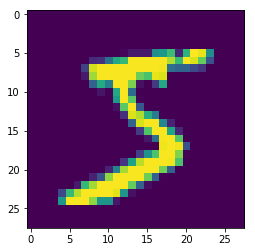

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Issue with the network(Used relu)
* Hear we have 25,348K perameters with acccuracy of 9.8% on this network
* Using MaxPool to reduce the kernel in the Convolution process.
* Perameter is high so it will be havey on GPU.
* we can reduce the perameter size and increase the accuracy for this network
* we have used the relu in each convulation wich remove the nagative values and hilight the postive values in kernel.


In [10]:
from keras.layers import Activation
model = Sequential()

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(1024, 3, 3, activation='relu'))
model.add(Convolution2D(2048, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))

W0816 16:28:36.181333 140209806579584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0816 16:28:36.218920 140209806579584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 16:28:36.225093 140209806579584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0816 16:28:36.369305 140209806579584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0816 16:28:36.395847 140209806579584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0816 16:28:36.631267 140209806579584 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0816 16:28:36.712501 140209806579584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 2/10
60000/60000 [==============================] - 108s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 109s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 109s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 109s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 109s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 109s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 109s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 109s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 109s 2ms/step - loss: 2.3026 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[2.3025851249694824, 0.098]


# Resolving Relu issue:-

* It's wrong to use the relu in last convolution layer as it will loose the featue from the channel and it, redure the accuracy.
* Now the accuracy of the network is 98%. 
* But still the perameter size is too high for the GPU. 



In [16]:
from keras.layers import Activation
model = Sequential()

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(1024, 3, 3, activation='relu'))
model.add(Convolution2D(2048, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1436 - acc: 0.9559
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0569 - acc: 0.9834
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0448 - acc: 0.9873
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0328 - acc: 0.9904
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0292 - acc: 0.9917
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0252 - acc: 0.9933
Epoch 7/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0233 - acc: 0.9938
Epoch 8/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0258 - acc: 0.9937
Epoch 9/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0170 - acc: 0.9956
Epoch 10/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0207 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [20]:
print(score)

[0.07283286887998429, 0.9859]


# Here we are using 1*1 :-

  *  We have used the 1*1 to reduce the kernel size in network.
  *  It will reduce the peramenter size expontialy .Now the perameter size is 17K.
  *  And accuracy alos inrease by 98 to 98.94 %.



In [32]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_lau

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 11, 11, 10)        330       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 9, 9, 16)          1456      
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 7, 7, 32)          4640      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [35]:
model.fit(X_train, Y_train, batch_size=32, 
          epochs=10, verbose=1, 
          validation_data=(X_test, Y_test), )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.2054 - acc: 0.9359 - val_loss: 0.0721 - val_acc: 0.9781
Epoch 2/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0712 - acc: 0.9790 - val_loss: 0.0541 - val_acc: 0.9852
Epoch 3/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0543 - acc: 0.9835 - val_loss: 0.0401 - val_acc: 0.9865
Epoch 4/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.0445 - acc: 0.9866 - val_loss: 0.0457 - val_acc: 0.9839
Epoch 5/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0380 - acc: 0.9889 - val_loss: 0.0357 - val_acc: 0.9884
Epoch 6/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0322 - acc: 0.9900 - val_loss: 0.0354 - val_acc: 0.9879
Epoch 7/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.0285 - acc: 0.9908 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [37]:
print(score)

[0.04228186010135105, 0.9879]


# BatchNormalization:-
* BatchNormalization will increase the accuracy of the network from 99.02%
* But the perameter size increased to 18K.
* BatchNormalization add some constant perameters in the network which cant be reduce.
* But Network has the overfitting issue.

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization

In [40]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0816 17:28:53.952550 140209806579584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  


In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 11, 11, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [43]:
model.fit(X_train, Y_train, batch_size=32, 
          epochs=10, verbose=1, 
          validation_data=(X_test, Y_test), )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 399us/step - loss: 0.1356 - acc: 0.9587 - val_loss: 0.0485 - val_acc: 0.9836
Epoch 2/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.0446 - acc: 0.9861 - val_loss: 0.0387 - val_acc: 0.9880
Epoch 3/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.0356 - acc: 0.9885 - val_loss: 0.0336 - val_acc: 0.9882
Epoch 4/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0283 - acc: 0.9912 - val_loss: 0.0339 - val_acc: 0.9887
Epoch 5/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0242 - acc: 0.9921 - val_loss: 0.0327 - val_acc: 0.9900
Epoch 6/10
60000/60000 [==============================] - 21s 354us/step - loss: 0.0214 - acc: 0.9930 - val_loss: 0.0351 - val_acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 21s 353us/step - loss: 0.0187 - acc: 0.9940 - val_loss: 0.

In [44]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.0330453496388558, 0.9902]


# Dropout:-

* Dropout will resolve the overfitting issue.
* But the perameter size is still 18K.
* now accuracy increased as 99.29%

In [64]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21:

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_10 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [66]:
model.fit(X_train, Y_train, batch_size=32, 
          epochs=20, verbose=1, 
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 413us/step - loss: 0.1623 - acc: 0.9510 - val_loss: 0.0564 - val_acc: 0.9833
Epoch 2/20
60000/60000 [==============================] - 22s 361us/step - loss: 0.0566 - acc: 0.9819 - val_loss: 0.0385 - val_acc: 0.9876
Epoch 3/20
60000/60000 [==============================] - 22s 360us/step - loss: 0.0441 - acc: 0.9863 - val_loss: 0.0367 - val_acc: 0.9888
Epoch 4/20
60000/60000 [==============================] - 22s 359us/step - loss: 0.0381 - acc: 0.9878 - val_loss: 0.0368 - val_acc: 0.9881
Epoch 5/20
60000/60000 [==============================] - 22s 361us/step - loss: 0.0340 - acc: 0.9893 - val_loss: 0.0327 - val_acc: 0.9889
Epoch 6/20
60000/60000 [==============================] - 22s 360us/step - loss: 0.0306 - acc: 0.9903 - val_loss: 0.0300 - val_acc: 0.9912
Epoch 7/20
60000/60000 [==============================] - 21s 358us/step - loss: 0.0266 - acc: 0.9915 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [68]:
print(score)

[0.02813087329264599, 0.9914]


* We have added the dinamic rate for learning 
* increased the batch size 32 to 512 , which increase the performance of the network

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [70]:
model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 7s 120us/step - loss: 0.0101 - acc: 0.9966 - val_loss: 0.0315 - val_acc: 0.9920
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 3s 56us/step - loss: 0.0078 - acc: 0.9977 - val_loss: 0.0321 - val_acc: 0.9915
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 3s 56us/step - loss: 0.0067 - acc: 0.9978 - val_loss: 0.0305 - val_acc: 0.9921
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 3s 56us/step - loss: 0.0055 - acc: 0.9983 - val_loss: 0.0337 - val_acc: 0.9908
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=========

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [72]:
print(score)

[0.02951201353563297, 0.9934]


# DropOut:-
* Added the dropout after every BatcNormalization 

In [76]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(16, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))#6
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))#4
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4, 4))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_28 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_27 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_29 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_28 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 24, 24, 10)        170       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [79]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 12s 195us/step - loss: 0.0434 - acc: 0.9863 - val_loss: 0.0310 - val_acc: 0.9909
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 108us/step - loss: 0.0326 - acc: 0.9895 - val_loss: 0.0312 - val_acc: 0.9903
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 107us/step - loss: 0.0269 - acc: 0.9915 - val_loss: 0.0309 - val_acc: 0.9911
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 106us/step - loss: 0.0256 - acc: 0.9919 - val_loss: 0.0314 - val_acc: 0.9907
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [80]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.022452907272291305, 0.9942]


In [0]:
y_pred = model.predict(X_test)

In [82]:
print(y_pred[:9])
print(y_test[:9])

[[1.05361539e-10 1.16649179e-08 1.04273612e-09 1.09025393e-07
  1.70821907e-12 1.12187377e-10 4.96072530e-13 9.99999881e-01
  6.80116364e-14 9.69590519e-11]
 [2.84938260e-08 2.73427645e-07 9.99998689e-01 1.01207071e-10
  8.06649325e-09 4.61614687e-12 9.19945933e-07 8.29240843e-10
  1.56702651e-10 1.58113876e-12]
 [5.42741303e-11 9.99999046e-01 2.79576640e-10 4.05532656e-11
  7.92541925e-07 6.33945252e-09 1.00571800e-08 1.70068304e-07
  4.97275693e-11 6.41387055e-10]
 [9.99978900e-01 3.04817921e-10 2.76603600e-07 4.19505186e-09
  4.70803542e-07 4.23618935e-08 1.76712565e-05 6.56289032e-08
  5.18257881e-09 2.66198549e-06]
 [6.97100667e-12 1.38339453e-11 1.43738086e-11 6.06439942e-12
  9.99993324e-01 2.23787178e-12 1.48194657e-09 8.62981492e-11
  2.74021750e-10 6.67723134e-06]
 [1.26335817e-10 9.99998569e-01 3.45097284e-10 4.09085890e-11
  4.06986175e-07 7.53134177e-09 4.82964735e-09 9.52840196e-07
  1.21638338e-10 6.80703383e-10]
 [4.35936573e-12 6.34139994e-08 8.79919228e-12 2.22769095e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [84]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored